## Titanic Modified

In [4]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import random

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

In [2]:
# Đọc dữ liệu
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [7]:
# Chia biến X, y
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

# Thêm bias vào X
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)


# Chia tập train, val, test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

print(f'X_train shape: {X_train.shape[0]}')
print(f'X_val shape: {X_val.shape[0]}')
print(f'X_test shape: {X_test.shape[0]}')

# Chuẩn hóa dữ liệu
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

# Cài đặt các hàm quan trọng
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - (1e-7))
    loss = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return loss

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat==y).mean()
    return acc

# Khai báo các siêu tham số và khởi tạo weights
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'Epoch {epoch+1}:\t Training loss: {train_batch_loss:.3f}\t Validation loss: {val_batch_loss:.3f}')

X_train shape: 623
X_val shape: 179
X_test shape: 89
Epoch 1:	 Training loss: 0.703	 Validation loss: 0.599
Epoch 2:	 Training loss: 0.670	 Validation loss: 0.582
Epoch 3:	 Training loss: 0.640	 Validation loss: 0.567
Epoch 4:	 Training loss: 0.614	 Validation loss: 0.555
Epoch 5:	 Training loss: 0.592	 Validation loss: 0.544
Epoch 6:	 Training loss: 0.572	 Validation loss: 0.535
Epoch 7:	 Training loss: 0.554	 Validation loss: 0.528
Epoch 8:	 Training loss: 0.539	 Validation loss: 0.522
Epoch 9:	 Training loss: 0.526	 Validation loss: 0.517
Epoch 10:	 Training loss: 0.514	 Validation loss: 0.513
Epoch 11:	 Training loss: 0.504	 Validation loss: 0.509
Epoch 12:	 Training loss: 0.495	 Validation loss: 0.507
Epoch 13:	 Training loss: 0.487	 Validation loss: 0.505
Epoch 14:	 Training loss: 0.480	 Validation loss: 0.503
Epoch 15:	 Training loss: 0.474	 Validation loss: 0.502
Epoch 16:	 Training loss: 0.468	 Validation loss: 0.501
Epoch 17:	 Training loss: 0.463	 Validation loss: 0.500
Epoc

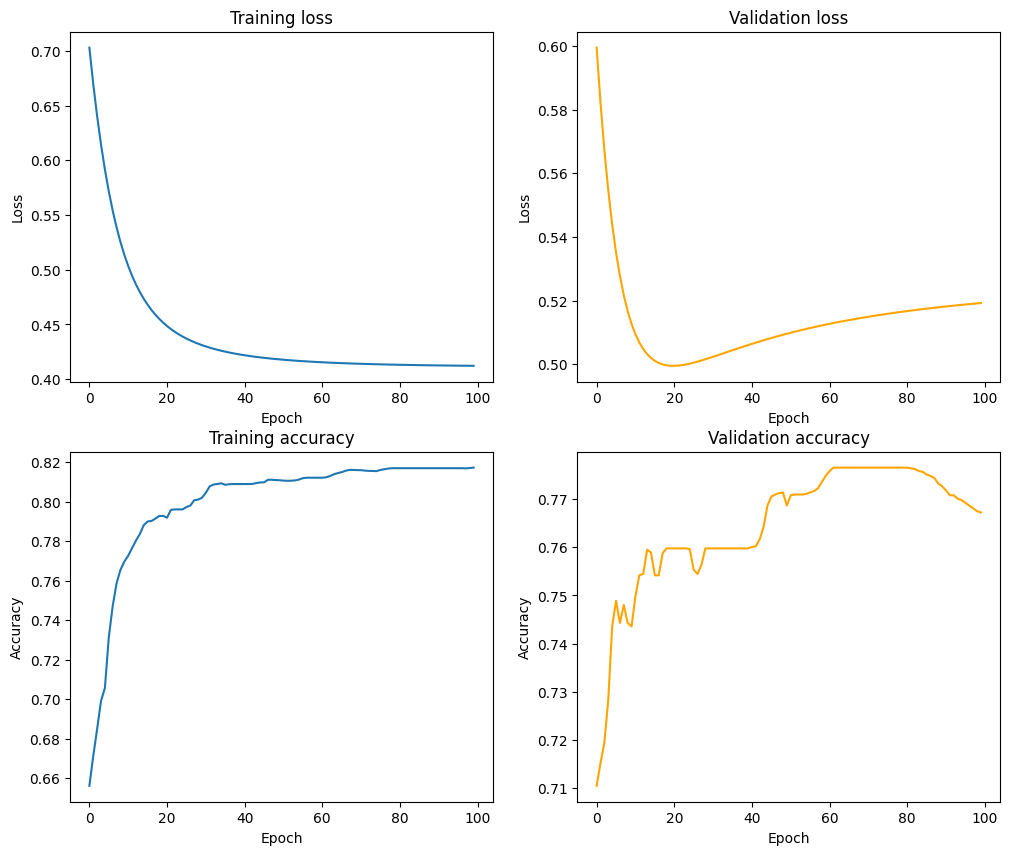

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation accuracy')

plt.show()

In [9]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set: ')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set: 
Accuracy: 0.770949720670391
Accuracy: 0.7752808988764045


## Sentiment Analysis

In [10]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import re
import nltk # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from nltk.tokenize import TweetTokenizer # type: ignore
from collections import defaultdict

In [12]:
dataset_path2 = 'sentiment_analysis.csv'
df2 = pd.read_csv(dataset_path2, index_col='id')
df2

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [13]:
# Xây dựng hàm chuẩn hóa văn bản
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)
    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # Hashtag removal
    text = text.replace('#', '')
    # Punction removal
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokenizer = TweetTokenizer(
                                preserve_case=False,
                                strip_handles=True,
                                reduce_len=True
                            )
    text_tokens = tokenizer.tokenize(text)
    return text_tokens

# Xây dựng bộ lưu giữ tần suất xuất hiện của các từ
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['tweet']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

# Xây dựng hàm tạo vector đặc trưng
def get_feature(text, freqs):
    tokens = text_normalize(text)
    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

# Trích xuất đặc trưng toàn bộ dữ liệu
X = []
y = []

freqs = get_freqs(df2)
for idx, row in df2.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

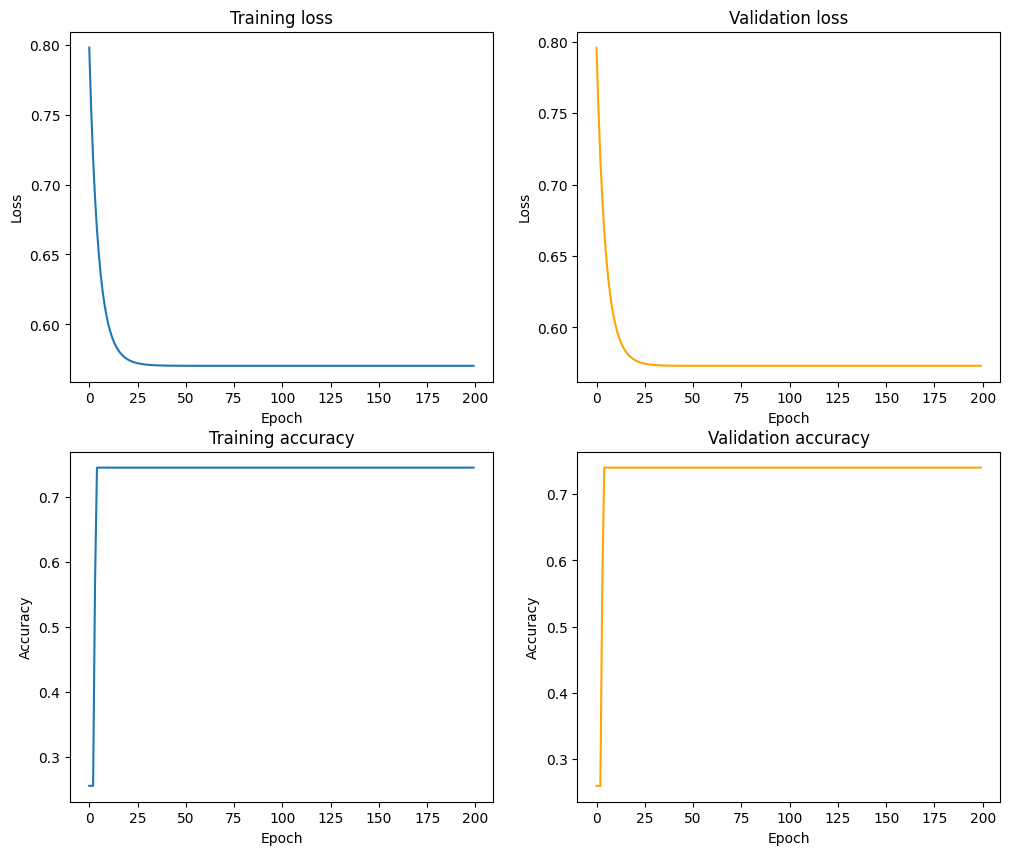

In [16]:
# Chia bộ train, val, test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

# Chuẩn hóa dữ liệu
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

# Cài đặt các hàm quan trọng
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - (1e-7))
    loss = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return loss

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat==y).mean()
    return acc

# Khai báo các siêu tham số và khởi tạo weights
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

# Huấn luyện mô hình
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation accuracy')

plt.show()

In [17]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set: ')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set: 
Accuracy: 0.73989898989899
Accuracy: 0.7512626262626263


## Câu hỏi trắc nghiệm

In [31]:
# Câu 13
X = [[22.3, -1.5, 1.1, 1]]
theta = [0.1, -0.15, 0.3, -0.2]

y_hat = predict(X, theta)
print(y_hat)

[0.92988994]


In [32]:
# Câu 14
y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])

loss = compute_loss(y_hat, y)
print(loss)

0.5043515376900958


In [28]:
# Câu 16
def compute_gradient(X, y_true, y_pred):
    X = np.array(X)  # Convert X to a NumPy array
    y_true = np.array(y_true)  # Convert y_true to a NumPy array
    y_pred = np.array(y_pred)  # Convert y_pred to a NumPy array

    gradient = np.dot(X.T, (np.array(y_pred) - np.array(y_true))) / len(y_true)
    return gradient

X = [[1, 2], [2, 1], [1, 1], [2, 2]]
y_true = [0, 1, 0, 1]
y_pred = [0.25, 0.75, 0.4, 0.8]

gradient = compute_gradient(X, y_true, y_pred)
print(gradient)

[-0.0625  0.0625]


In [6]:
# Câu 17
import numpy as np

def compute_accuracy17(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    accuracy = np.mean(y_true == y_pred_rounded)

    return accuracy

y_true = [1, 0, 1, 1]
y_pred = [0.85, 0.35, 0.9, 0.75]

accuracy = compute_accuracy17(y_true, y_pred)
print(accuracy)

1.0


In [34]:
# Câu 18
X = [[1, 3], [2, 1], [3, 2], [1, 2]]
y_true = [1, 0, 1, 1]
y_pred = [0.7, 0.4, 0.6, 0.85]

gradient = compute_gradient(X, y_true, y_pred)
print(gradient)

[-0.2125 -0.4   ]
